<a href="https://colab.research.google.com/github/intimanjunath/Data-preparation-eda-visualizatoin/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install --upgrade numpy pandas matplotlib seaborn

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [79]:
# Comprehensive Time Series Analysis of Air Passenger Traffic Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Download and load the dataset
from sklearn.datasets import fetch_openml

# Load Air Passengers dataset
def load_airpassengers():
    df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
    df['Month'] = pd.to_datetime(df['Month'])
    return df

In [4]:
# Load and preview the dataset
data = load_airpassengers()
data = data.rename(columns={'Month': 'Date', 'Passengers': 'Traffic'})
data.set_index('Date', inplace=True)

In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Traffic  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

First few rows:
            Traffic
Date               
1949-01-01      112
1949-02-01      118
1949-03-01      132
1949-04-01      129
1949-05-01      121


In [6]:
# Basic statistical analysis
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
          Traffic
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [7]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Traffic    0
dtype: int64


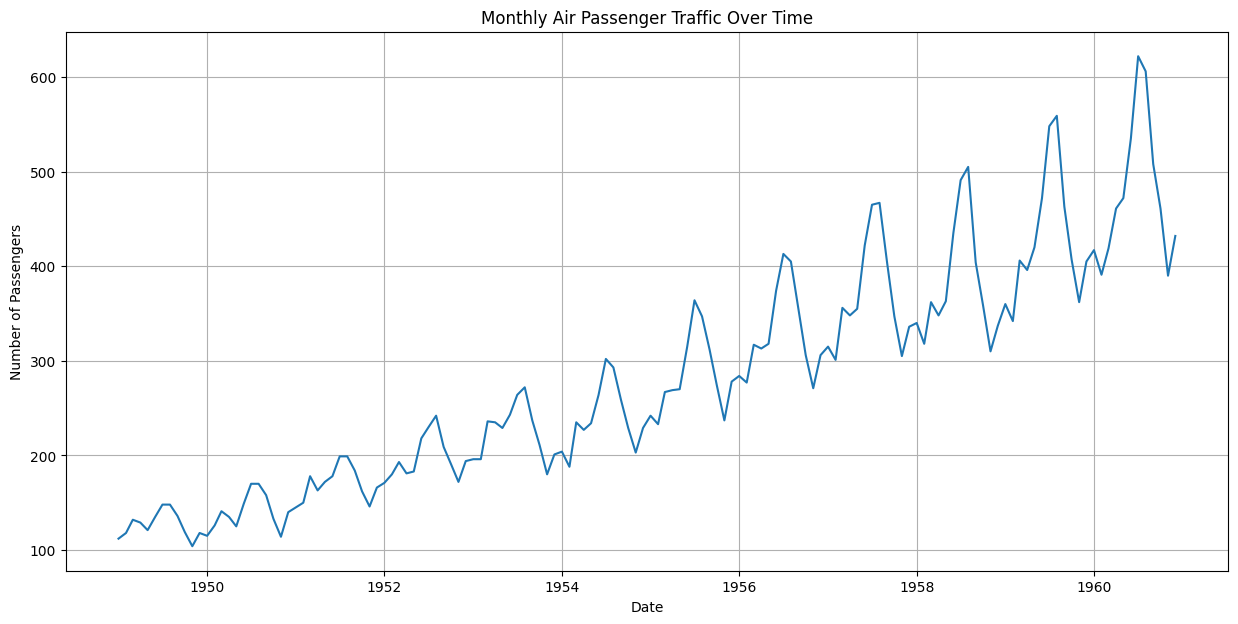

In [8]:
# Time series visualization
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Traffic'])
plt.title('Monthly Air Passenger Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

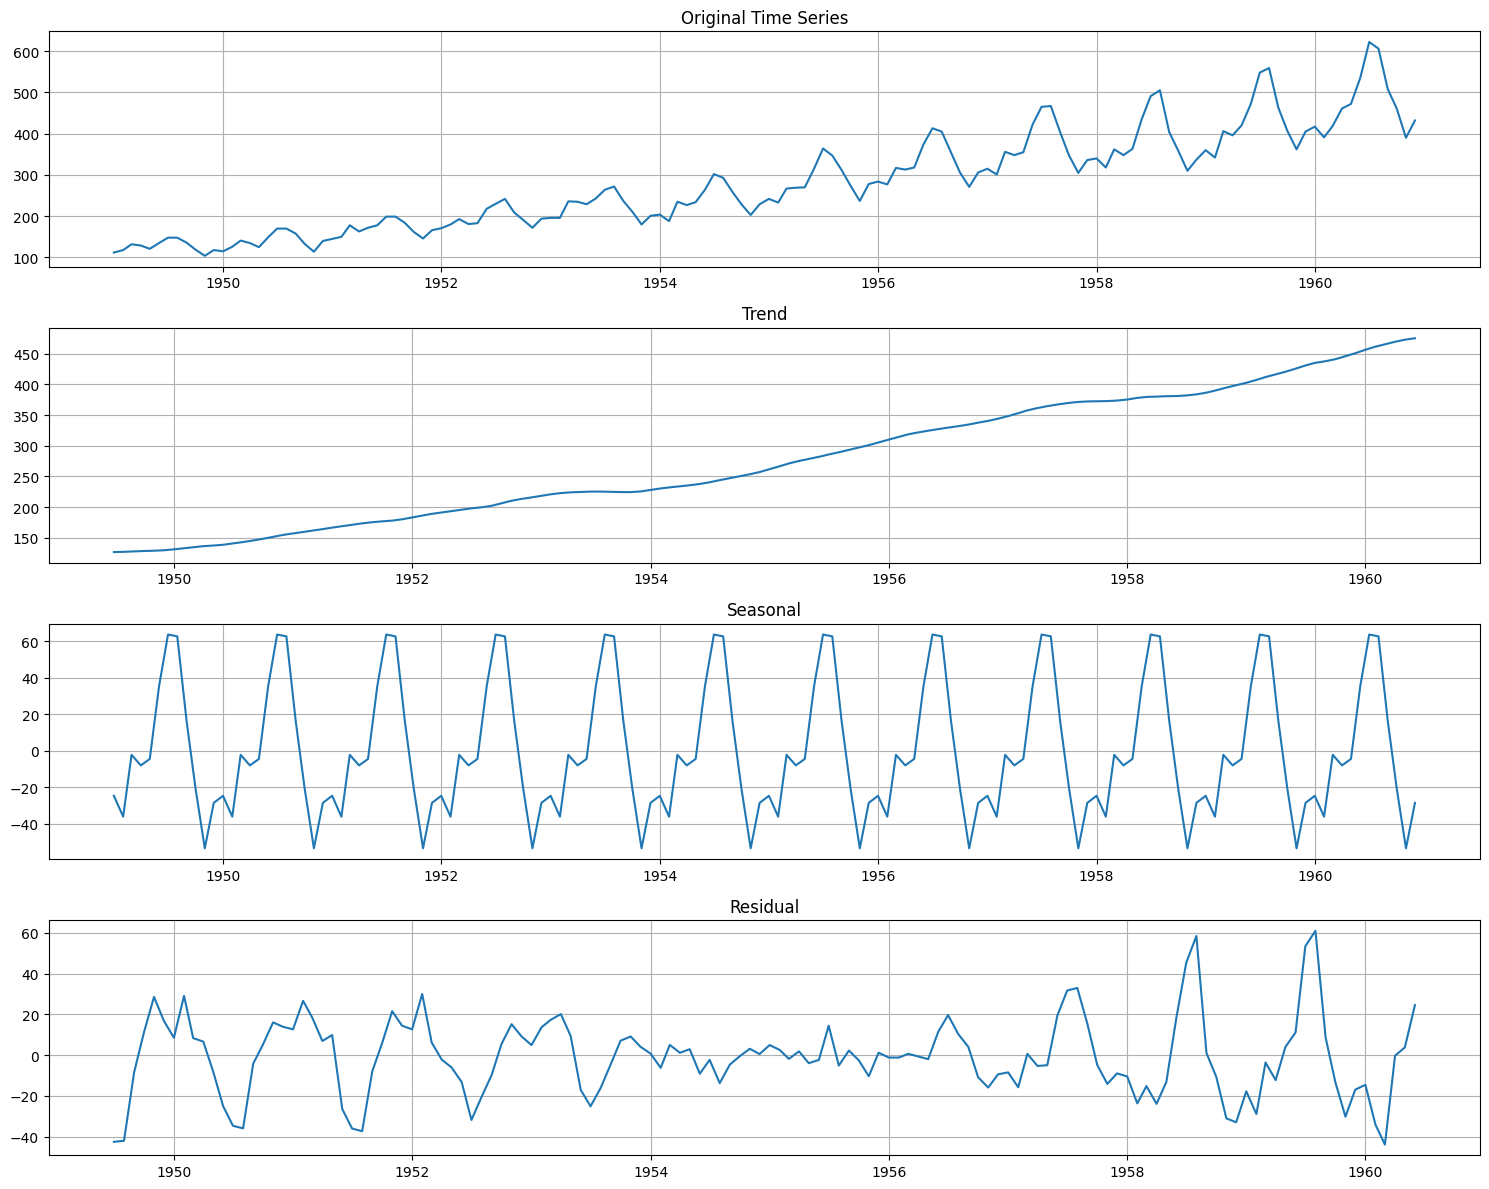

In [9]:
# Decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Traffic'], period=12)

plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(data.index, data['Traffic'])
plt.title('Original Time Series')
plt.grid(True)

plt.subplot(412)
plt.plot(data.index, decomposition.trend)
plt.title('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(data.index, decomposition.seasonal)
plt.title('Seasonal')
plt.grid(True)

plt.subplot(414)
plt.plot(data.index, decomposition.resid)
plt.title('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Add features for analysis
data['Year'] = data.index.year
data['Month_Num'] = data.index.month
data['Quarter'] = data.index.quarter

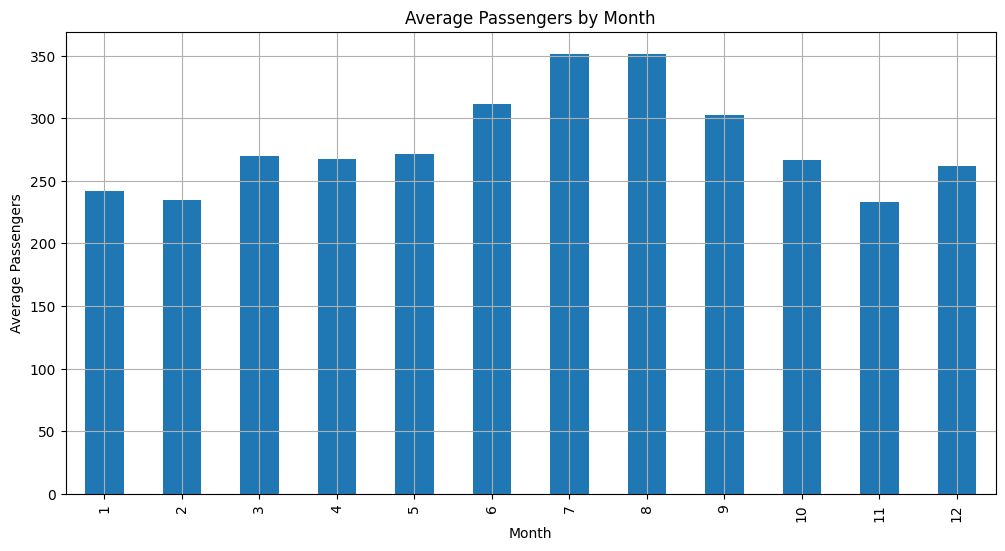

In [11]:
# Monthly average passengers
monthly_avg = data.groupby('Month_Num')['Traffic'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.grid(True)
plt.show()

In [12]:
# Anomaly Detection using Z-score method
def detect_anomalies(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    return abs(z_scores) > threshold

In [13]:
# Detect anomalies
data['is_anomaly'] = detect_anomalies(data, 'Traffic')

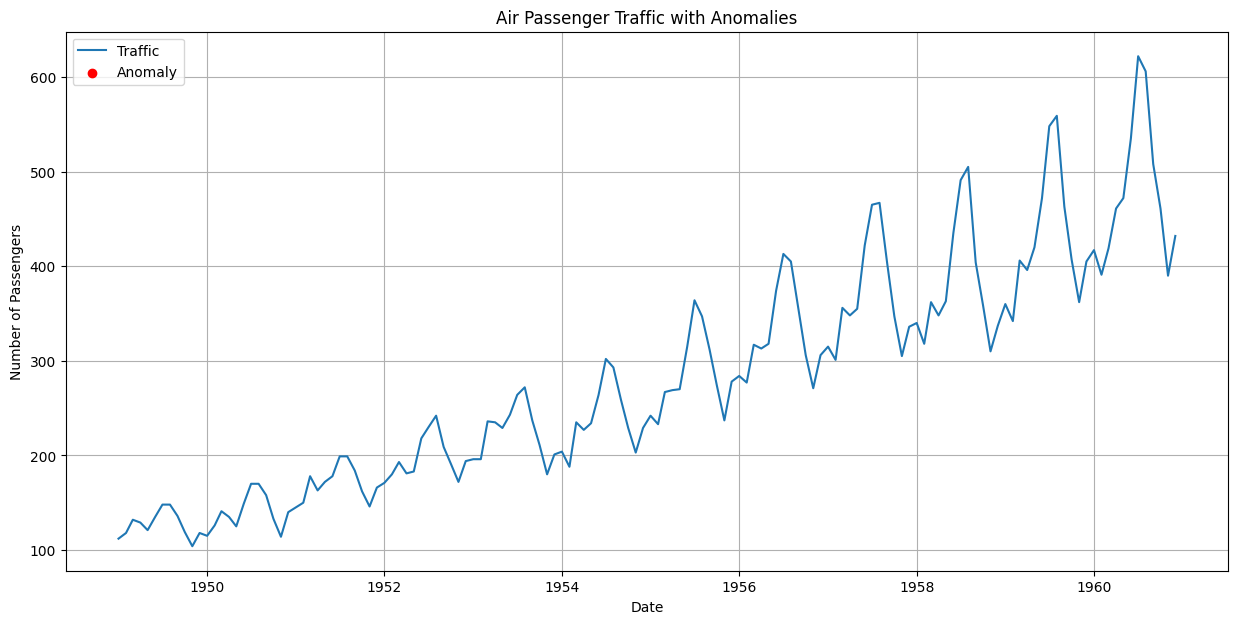

In [14]:
# Plot with anomalies highlighted
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Traffic'], label='Traffic')
plt.scatter(data[data['is_anomaly']].index,
           data[data['is_anomaly']]['Traffic'],
           color='red',
           label='Anomaly')
plt.title('Air Passenger Traffic with Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
# Prepare data for clustering
cluster_features = pd.DataFrame({
    'Traffic': data['Traffic'],
    'Month_Num': data['Month_Num'],
    'Year': data['Year']
})


In [17]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

In [18]:
# Apply KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Add cluster labels to the data
data['Cluster'] = cluster_labels

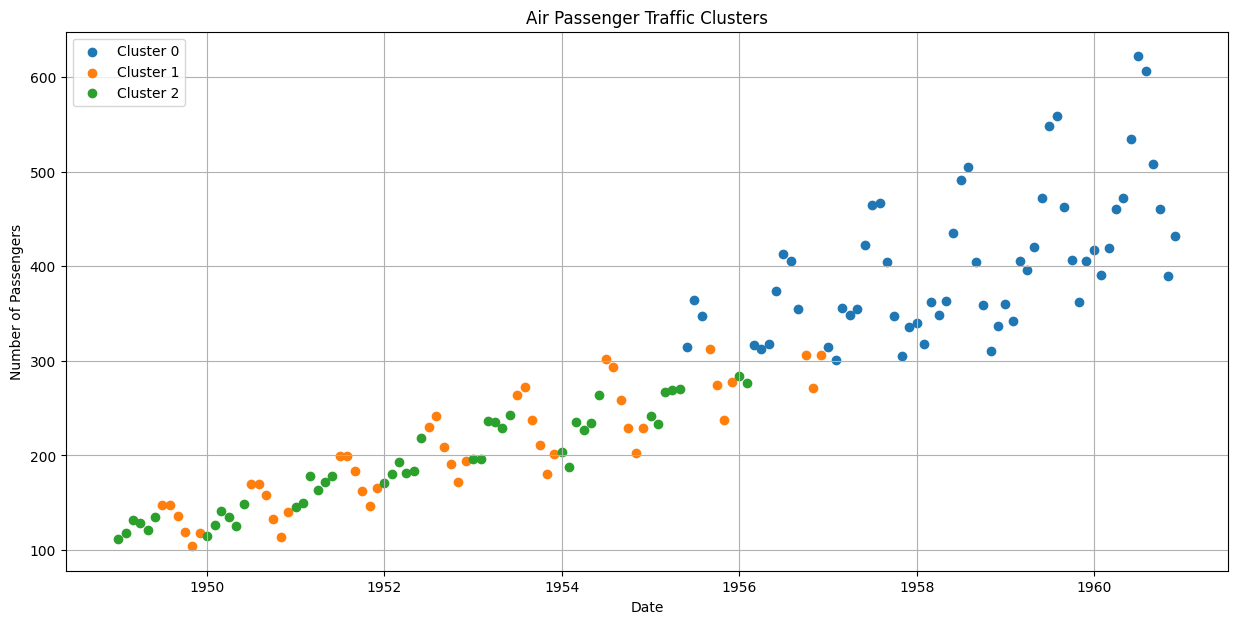

In [20]:
# Visualize clusters
plt.figure(figsize=(15, 7))
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Traffic'],
               label=f'Cluster {i}')
plt.title('Air Passenger Traffic Clusters')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Feature Engineering for ML
data['Lag1'] = data['Traffic'].shift(1)
data['Lag12'] = data['Traffic'].shift(12)  # Previous year
data['Rolling_Mean'] = data['Traffic'].rolling(window=12).mean()
data['Rolling_Std'] = data['Traffic'].rolling(window=12).std()

In [22]:
# Drop rows with NaN values after feature engineering
data_cleaned = data.dropna()

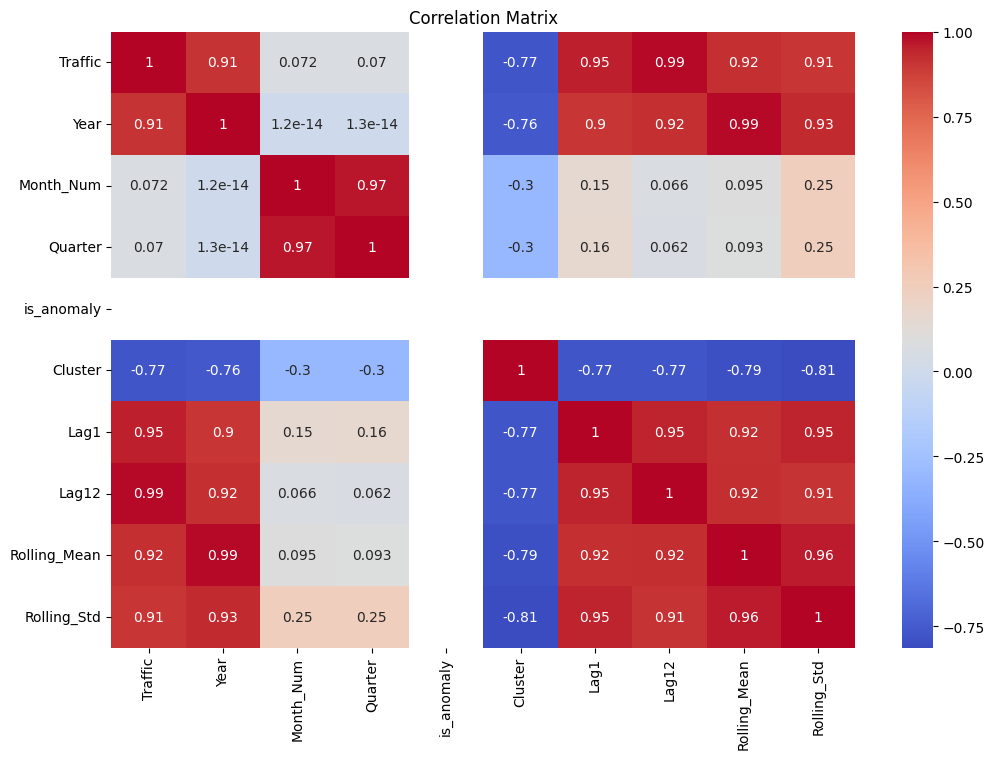

In [23]:
#Feature selection
# Correlation Matrix to Assess Feature Relevance
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Train-Test Split
train_size = int(len(data_cleaned) * 0.8)  # 80% for training
train_data = data_cleaned[:train_size]
test_data = data_cleaned[train_size:]

print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")


Train Data Shape: (105, 10)
Test Data Shape: (27, 10)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32118D+00    |proj g|=  1.43150D-01

At iterate    5    f=  3.30988D+00    |proj g|=  1.47798D-03

At iterate   10    f=  3.30942D+00    |proj g|=  1.36135D-02

At iterate   15    f=  3.30275D+00    |proj g|=  2.80796D-02

At iterate   20    f=  3.29868D+00    |proj g|=  1.79891D-03

At iterate   25    f=  3.29812D+00    |proj g|=  3.13562D-03

At iterate   30    f=  3.29798D+00    |proj g|=  2.11684D-04

At iterate   35    f=  3.29795D+00    |proj g|=  3.91188D-04

At iterate   40    f=  3.29794D+00    |proj g|=  5.20309D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

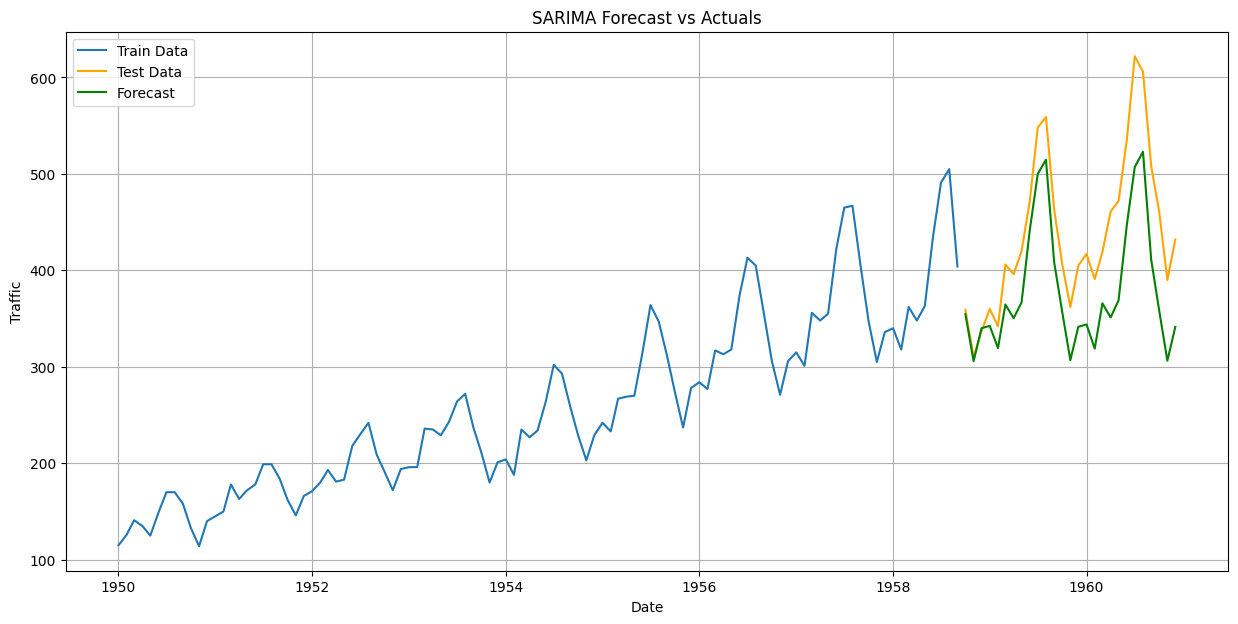

In [25]:
#Time Series Forecasting Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(train_data['Traffic'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast on Test Data
forecast = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(train_data['Traffic'], label='Train Data')
plt.plot(test_data['Traffic'], label='Test Data', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#Evaluate Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(test_data['Traffic'], forecast)
mae = mean_absolute_error(test_data['Traffic'], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data['Traffic'] - forecast) / test_data['Traffic'])) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 59.56
Mean Squared Error (MSE): 4597.65
Root Mean Squared Error (RMSE): 67.81
Mean Absolute Percentage Error (MAPE): 13.11%


In [27]:
#Experiment with Advanced Models
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# ARIMA
arima_model = ARIMA(train_data['Traffic'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test_data))

# Prophet
prophet_data = train_data.reset_index().rename(columns={"Date": "ds", "Traffic": "y"})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=len(test_data))
prophet_forecast = prophet_model.predict(future)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcjyy0fvt/6o_19fe2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcjyy0fvt/yhot2zz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thre

In [29]:
#Perform Cross-Validation
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(data_cleaned):
    train, test = data_cleaned.iloc[train_idx], data_cleaned.iloc[test_idx]
    model = SARIMAX(train['Traffic'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])
    print(mean_squared_error(test['Traffic'], predictions))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40793D+00    |proj g|=  2.76921D-02

At iterate    5    f=  1.39397D+00    |proj g|=  1.69466D-03

At iterate   10    f=  1.39365D+00    |proj g|=  3.77483D-03

At iterate   15    f=  1.39243D+00    |proj g|=  8.28891D-03

At iterate   20    f=  1.39196D+00    |proj g|=  6.88187D-03

At iterate   25    f=  1.39166D+00    |proj g|=  3.65508D-03

At iterate   30    f=  1.39148D+00    |proj g|=  2.24149D-03

At iterate   35    f=  1.39136D+00    |proj g|=  1.83841D-03

At iterate   40    f=  1.39130D+00    |proj g|=  3.00303D-03

At iterate   45    f=  1.39126D+00    |proj g|=  2.61208D-03

At iterate   50    f=  1.39123D+00    |proj g|=  1.66797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66968D+00    |proj g|=  3.03821D-01

At iterate    5    f=  2.56092D+00    |proj g|=  3.03310D-02

At iterate   10    f=  2.48650D+00    |proj g|=  7.98199D-03

At iterate   15    f=  2.47835D+00    |proj g|=  7.07147D-03

At iterate   20    f=  2.47828D+00    |proj g|=  6.91292D-04

At iterate   25    f=  2.47827D+00    |proj g|=  1.21870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24874D+00    |proj g|=  6.38999D-01

At iterate    5    f=  2.98191D+00    |proj g|=  4.05954D-02

At iterate   10    f=  2.98012D+00    |proj g|=  3.29931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     20      1     0     0   8.033D-06   2.980D+00
  F =   2.9801164069372397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
181.44397786639627
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.16019D+00    |proj g|=  1.32480D-02

At iterate   10    f=  3.15897D+00    |proj g|=  3.66205D-04

At iterate   15    f=  3.15896D+00    |proj g|=  5.99919D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   8.213D-06   3.159D+00
  F =   3.1589649797109085     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
616.8384769621052


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33916D+00    |proj g|=  1.38060D-01

At iterate    5    f=  3.32846D+00    |proj g|=  2.10414D-03

At iterate   10    f=  3.32682D+00    |proj g|=  1.35473D-02

At iterate   15    f=  3.32414D+00    |proj g|=  1.61134D-02

At iterate   20    f=  3.32375D+00    |proj g|=  2.10732D-03

At iterate   25    f=  3.32358D+00    |proj g|=  1.48424D-03

At iterate   30    f=  3.32351D+00    |proj g|=  1.24646D-03

At iterate   35    f=  3.32349D+00    |proj g|=  4.34595D-05

At iterate   40    f=  3.32348D+00    |proj g|=  3.75763D-05

At iterate   45    f=  3.32348D+00    |proj g|=  2.41010D-04


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.32348D+00    |proj g|=  2.21828D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   2.218D-04   3.323D+00
  F =   3.3234789302307837     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
1912.6416821499033


In [30]:
#Combine Forecasts with an Ensemble Model
# Example of weighted average
combined_forecast = (0.4 * sarima_result.predict(start=test_data.index[0], end=test_data.index[-1]) +
                     0.3 * arima_forecast +
                     0.3 * prophet_forecast['yhat'])

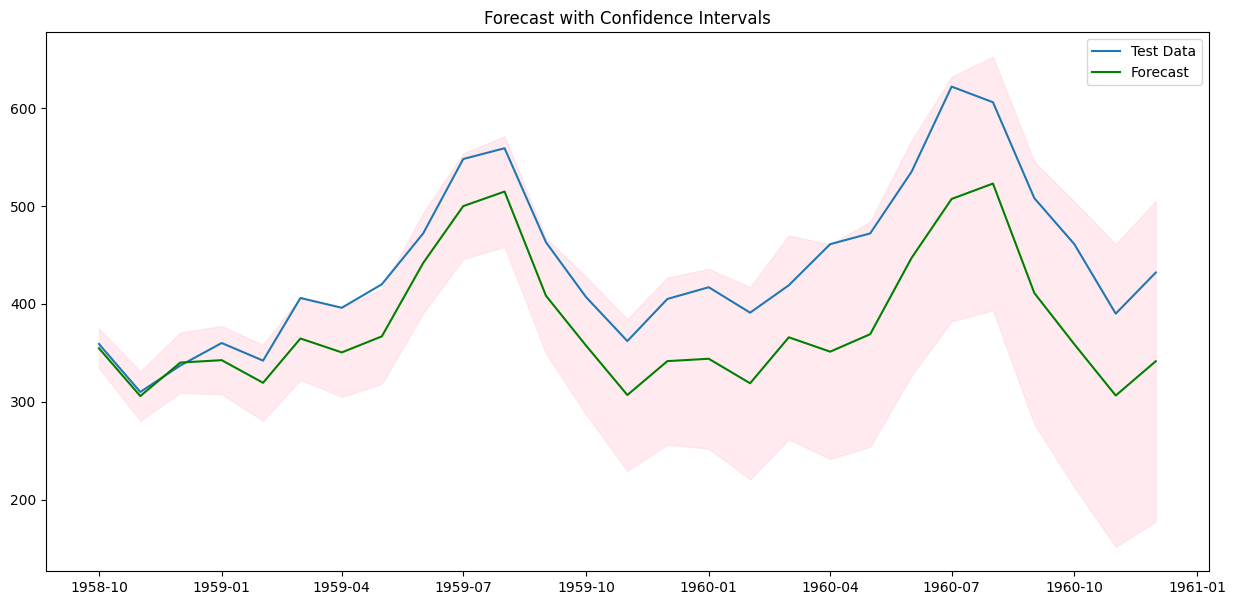

In [31]:
#Investigate Forecasting Intervals
forecast_with_intervals = sarima_result.get_forecast(steps=len(test_data))
forecast_ci = forecast_with_intervals.conf_int()

plt.figure(figsize=(15, 7))
plt.plot(test_data['Traffic'], label='Test Data')
plt.plot(forecast, label='Forecast', color='green')
plt.fill_between(test_data.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast with Confidence Intervals')
plt.legend()
plt.show()


In [32]:
import scipy
print(scipy.__version__)  # Should print 1.7.3

1.7.3


In [ ]:
#!pip show scipy autoviml

In [ ]:
#!pip uninstall -y scipy
#!pip install scipy==1.7.3

In [36]:
from autoviml.Auto_ViML import Auto_ViML

In [37]:
# Import the necessary library
from sklearn.model_selection import train_test_split

#Prepare the Dataset for AutoVIML
# Reset index to use Date as a feature
data_cleaned = data_cleaned.reset_index()

# Prepare data for AutoVIML
target = 'Traffic'  # Define target column
features = data_cleaned.drop(columns=['Traffic'])  # All other columns are features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, data_cleaned[target], test_size=0.2, random_state=42)

# Combine X_train and y_train for AutoVIML input
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

In [41]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [42]:
print(data_cleaned.columns)

Index(['level_0', 'index', 'Date', 'Traffic', 'Year', 'Month_Num', 'Quarter',
       'is_anomaly', 'Cluster', 'Lag1', 'Lag12', 'Rolling_Mean',
       'Rolling_Std'],
      dtype='object')


In [45]:
data_cleaned = data_cleaned.drop(columns=['level_0', 'index'], errors='ignore').reset_index(drop=True)
print(data_cleaned.head())

        Date  Traffic  Year  Month_Num  Quarter  is_anomaly  Cluster   Lag1  \
0 1950-01-01      115  1950          1        1       False        2 118.00   
1 1950-02-01      126  1950          2        1       False        2 115.00   
2 1950-03-01      141  1950          3        1       False        2 126.00   
3 1950-04-01      135  1950          4        2       False        2 141.00   
4 1950-05-01      125  1950          5        2       False        2 135.00   

   Lag12  Rolling_Mean  Rolling_Std  
0 112.00        126.92        13.45  
1 118.00        127.58        13.17  
2 132.00        128.33        13.69  
3 129.00        128.83        13.82  
4 121.00        129.17        13.66  


In [49]:
train_data['is_anomaly'] = train_data['is_anomaly'].fillna(0).astype(int)
X_test['is_anomaly'] = X_test['is_anomaly'].fillna(0).astype(int)

In [55]:
print(train_data.columns)
print(X_test.columns)

Index(['level_0', 'index', 'Date', 'Year', 'Month_Num', 'Quarter',
       'is_anomaly', 'Cluster', 'Lag1', 'Lag12', 'Rolling_Mean', 'Rolling_Std',
       'Traffic'],
      dtype='object')
Index(['level_0', 'index', 'Date', 'Year', 'Month_Num', 'Quarter',
       'is_anomaly', 'Cluster', 'Lag1', 'Lag12', 'Rolling_Mean',
       'Rolling_Std'],
      dtype='object')


In [56]:
# Create DayOfWeek feature in both train and test datasets
train_data['DayOfWeek'] = pd.to_datetime(train_data['Date']).dt.dayofweek  # Monday=0, Sunday=6
X_test['DayOfWeek'] = pd.to_datetime(X_test['Date']).dt.dayofweek

In [57]:
train_data = train_data.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

In [58]:
print(train_data.dtypes)
print(X_test.dtypes)

level_0         float64
index           float64
Year            float64
Month_Num       float64
Quarter         float64
is_anomaly        int64
Cluster         float64
Lag1            float64
Lag12           float64
Rolling_Mean    float64
Rolling_Std     float64
Traffic         float64
DayOfWeek       float64
dtype: object
level_0           int64
index             int64
Year              int64
Month_Num         int64
Quarter           int64
is_anomaly        int64
Cluster           int32
Lag1            float64
Lag12           float64
Rolling_Mean    float64
Rolling_Std     float64
DayOfWeek         int64
dtype: object


In [59]:
train_data = train_data.drop(columns=['level_0', 'index'])
X_test = X_test.drop(columns=['level_0', 'index'])

In [61]:
train_features = train_data.drop(columns=['Traffic']).columns
test_features = X_test.columns

assert set(train_features) == set(test_features), "Train and Test features do not match!"

In [63]:
print(train_data.isnull().sum())

Year            23
Month_Num       23
Quarter         23
is_anomaly       0
Cluster         23
Lag1            23
Lag12           23
Rolling_Mean    23
Rolling_Std     23
Traffic         23
DayOfWeek       23
dtype: int64


In [64]:
# Step 1: Impute Missing Values
# Fill missing numeric values with the median for both train and test datasets
train_data = train_data.fillna(train_data.median())
X_test = X_test.fillna(X_test.median())

# Impute or drop missing values in the target column `Traffic`
# Option 1: Drop rows with missing Traffic values
train_data = train_data.dropna(subset=['Traffic'])

# Option 2 (Alternative): Uncomment below if you prefer to impute missing Traffic values
# train_data['Traffic'] = train_data['Traffic'].fillna(train_data['Traffic'].median())

# Step 2: Validate Missing Values Are Handled
print("Missing values in train_data:")
print(train_data.isnull().sum())
print("\nMissing values in X_test:")
print(X_test.isnull().sum())

# Step 3: Align Train and Test Features
# Ensure train and test datasets have the same columns
train_features = train_data.drop(columns=['Traffic']).columns
X_test_features = X_test.columns

# Align columns between train and test datasets
train_data, X_test = train_data.align(X_test, join='left', axis=1, fill_value=0)

# Validate alignment
print("\nTrain Data Shape:", train_data.shape)
print("Test Data Shape:", X_test.shape)

Missing values in train_data:
Year            0
Month_Num       0
Quarter         0
is_anomaly      0
Cluster         0
Lag1            0
Lag12           0
Rolling_Mean    0
Rolling_Std     0
Traffic         0
DayOfWeek       0
dtype: int64

Missing values in X_test:
Year            0
Month_Num       0
Quarter         0
is_anomaly      0
Cluster         0
Lag1            0
Lag12           0
Rolling_Mean    0
Rolling_Std     0
DayOfWeek       0
dtype: int64

Train Data Shape: (128, 11)
Test Data Shape: (27, 11)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (128, 11)
    Training Set Memory Usage = 0.02 MB
Test Set Shape = (27, 11)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['Traffic']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boole

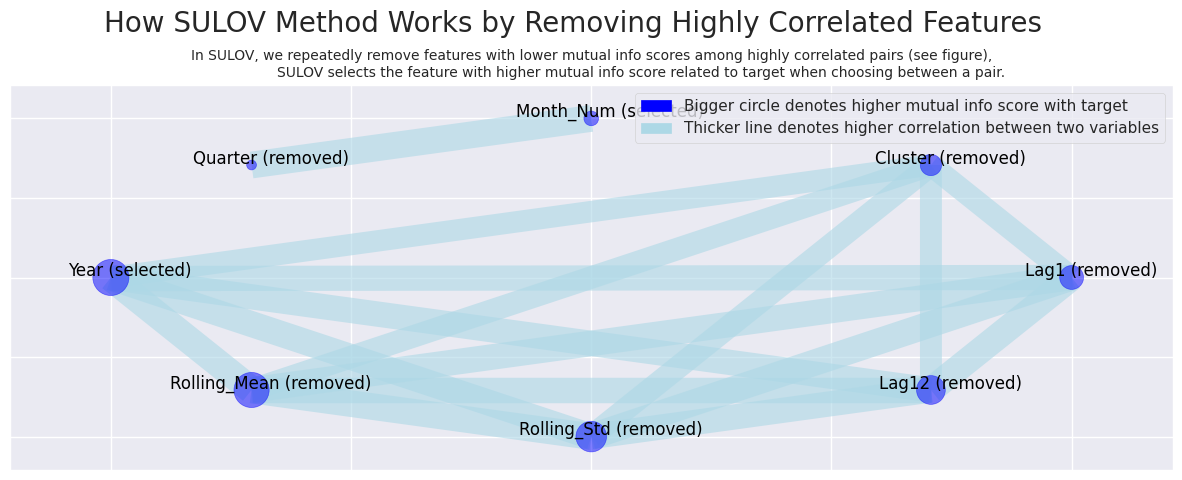

Splitting selected features into float and categorical (integer) variables:
    (3) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 3 
    Finding Important Features using Boosted Trees algorithm...
        using 3 variables...
Found 3 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  115 , CV rows =  13
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
#################################################################################
######## Linea

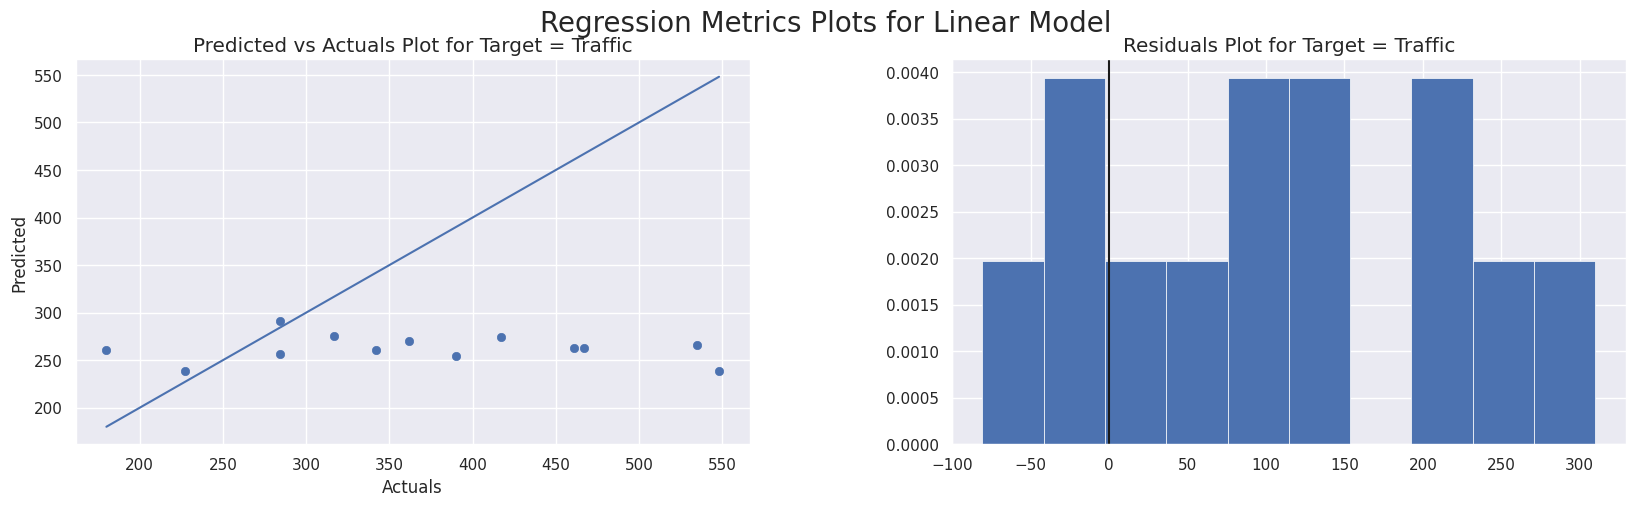

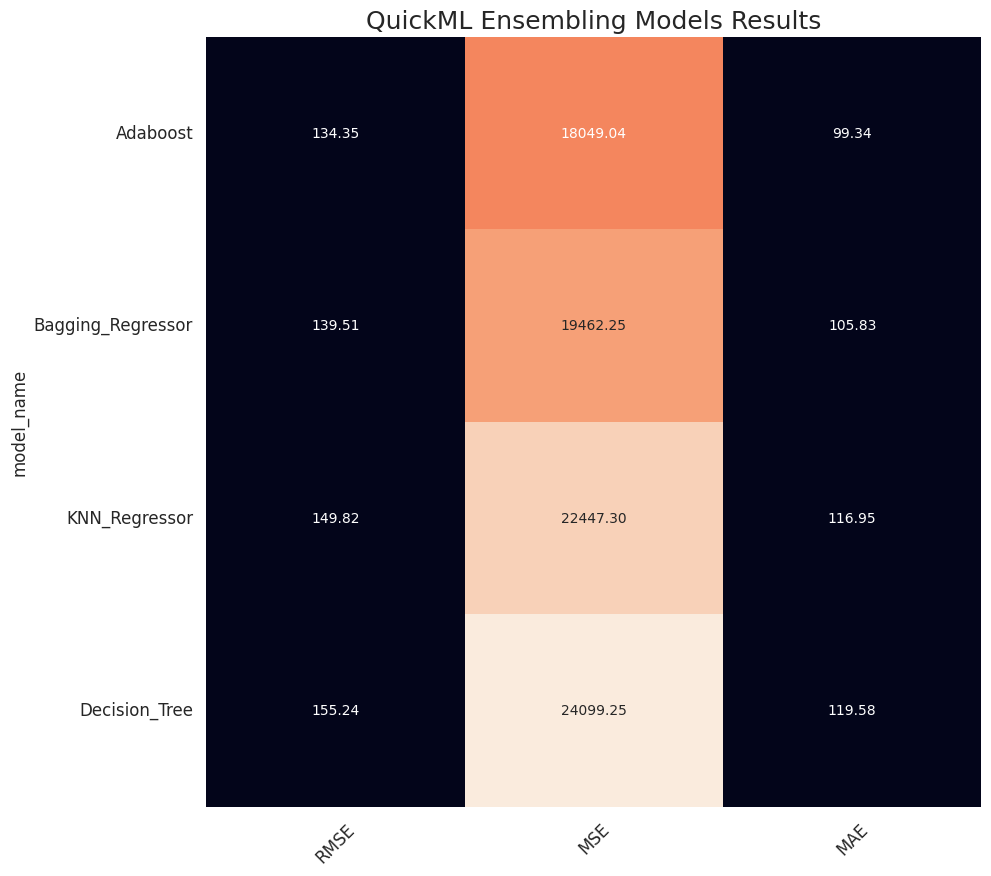

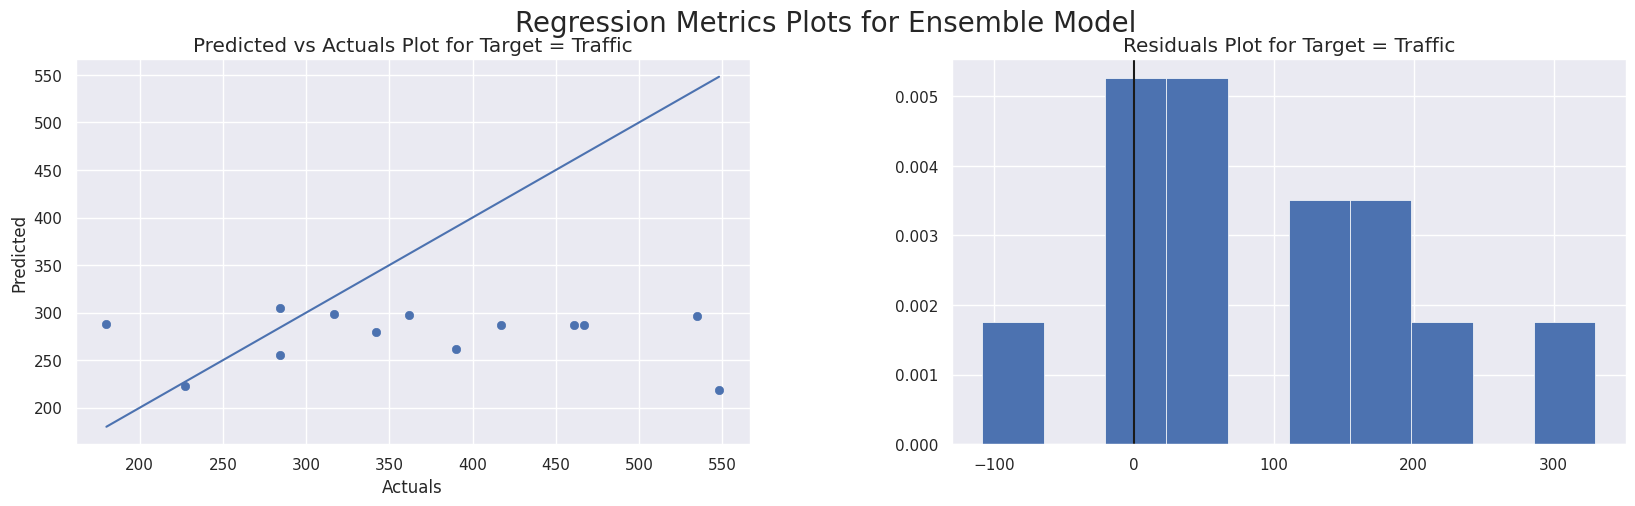

<Figure size 1500x500 with 0 Axes>

In [65]:
from autoviml.Auto_ViML import Auto_ViML

model, best_features, train_modified, test_modified = Auto_ViML(
    train=train_data,  # Training dataset
    target='Traffic',  # Target variable
    test=X_test,  # Testing dataset (features only)
    sample_submission='',  # Not required for this task
    scoring_parameter='r2',  # Define scoring metric
    hyper_param='GS',  # GridSearch for hyperparameter optimization
    verbose=1  # Verbosity level
)

In [67]:
print("Best Features Selected by AutoVIML:")
print(best_features)

print("\nTransformed Train Dataset:")
print(train_modified.head())

print("\nTransformed Test Dataset:")
print(test_modified.head())

Best Features Selected by AutoVIML:
['Month_Num', 'Year', 'DayOfWeek']

Transformed Train Dataset:
     Month_Num     Year  DayOfWeek  Traffic
95       12.00 1,957.00       6.00   271.00
96        1.00 1,958.00       2.00   391.00
0         1.00 1,950.00       6.00   336.00
12        1.00 1,951.00       0.00   312.00
126       7.00 1,960.00       4.00   284.00

Transformed Test Dataset:
    Month_Num  Year  DayOfWeek  Traffic_Adaboost_predictions  \
56       0.73  0.40       0.33                        305.37   
83       1.00  0.60       0.83                        305.37   
19       0.64  0.10       0.33                        261.04   
31       0.64  0.20       0.67                        261.04   
76       0.36  0.60       0.17                        305.37   

    Traffic_Bagging_Regressor_predictions  Traffic_KNN_Regressor_predictions  \
56                                 302.17                             285.00   
83                                 293.99                        

In [71]:
#Evaluate the Model's Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract true target values and ensembled predictions
true_labels = X_test['Traffic']  # Replace with actual target values if available
ensembled_predictions = test_modified['Traffic_Ensembled_predictions']

# Calculate metrics for the ensembled model
mse = mean_squared_error(true_labels, ensembled_predictions)
mae = mean_absolute_error(true_labels, ensembled_predictions)
rmse = mse ** 0.5

print(f"Ensembled Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Ensembled Model Performance:
Mean Absolute Error (MAE): 281.72
Mean Squared Error (MSE): 79650.08
Root Mean Squared Error (RMSE): 282.22
